In [1]:
from stereo_camera import *
import matplotlib.pyplot as plt

In [2]:
image_search = './calibrate_images/*.png'
checker_def = (9,6,40) # 9x6 checkerboard; 40mm square size.
scale_ratio = 0.5

object_points, left_image_points, right_image_points, scaled_image_dims = get_corners (image_search, checker_def, scale_ratio)

calibration_data = calibrate_cameras(object_points, left_image_points, right_image_points, scaled_image_dims)

In [3]:
rms_left = calibration_data['rms_left']
left_camera_matrix = calibration_data['left_camera_matrix']
left_dist_coeffs = calibration_data['left_dist_coeffs']

print (rms_left)
print (left_camera_matrix)
print (left_dist_coeffs)

0.10817302482162608
[[316.5971768    0.         154.25497779]
 [  0.         318.02093241 118.64072686]
 [  0.           0.           1.        ]]
[[ 2.65913078e-01 -6.64866723e-01  1.23642329e-04 -1.68039688e-03
  -3.34851919e-03]]


In [4]:
rms_right = calibration_data['rms_right']
right_camera_matrix = calibration_data['right_camera_matrix']
right_dist_coeffs = calibration_data['right_dist_coeffs']

print (rms_right)
print (right_camera_matrix)
print (right_dist_coeffs)

0.10239977953849619
[[322.10050296   0.         161.76425372]
 [  0.         323.6592749  122.41466322]
 [  0.           0.           1.        ]]
[[ 1.99451327e-01 -2.12229779e-01 -4.68194262e-04  1.22593815e-03
  -1.19143822e+00]]


In [5]:
rms_stereo = calibration_data['rms_stereo']
T = calibration_data['T']
Q = calibration_data['Q']

print(rms_stereo)
print(T)
print(Q)

0.11038568445467391
[[-65.19242277]
 [ -0.23021541]
 [ -1.77505927]]
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 -1.53756018e+02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -1.20883785e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.20840104e+02]
 [ 0.00000000e+00  0.00000000e+00  1.53334276e-02 -0.00000000e+00]]


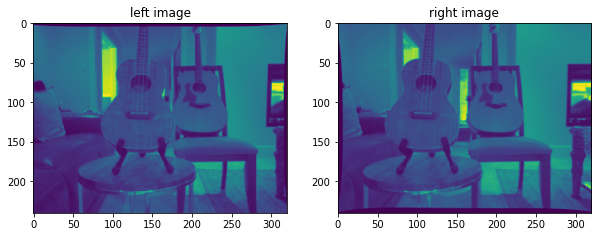

In [6]:
left_map_1 = calibration_data['left_map_1']
left_map_2 = calibration_data['left_map_2']
right_map_1 = calibration_data['right_map_1']
right_map_2 = calibration_data['right_map_2']

image_filename = 'test.jpg'

image_pair = cv2.imread(image_filename, cv2.IMREAD_COLOR)
image_pair = cv2.cvtColor(image_pair, cv2.COLOR_BGR2GRAY)
image_left, image_right, _ = split_image(image_pair)

rectified_image_left = cv2.remap(image_left, left_map_1, left_map_2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
rectified_image_right = cv2.remap(image_right, right_map_1, right_map_2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

_, image_cells = plt.subplots(1, 2, figsize=(10, 10))
image_cells[0].imshow(rectified_image_left)
image_cells[0].set_title('left image')
image_cells[1].imshow(rectified_image_right)
image_cells[1].set_title('right image')
plt.show()

In [7]:
save_calibration_data(calibration_data, 'calibration_data.npz')